## 각 클래스 데이터 탐색 및 시각화
- 데이터 불균형 해소를 위해 클래스 제거/ 데이터 증강 및 언더샘플링을 진행하기 전에 판단 기준을 잡기위해 진행하는 사전작업입니다 (혹은 동시에 진행하는 작업입니다).
- oversampling.ipynb 파일과 동시에 진행

In [1]:
import os

def count_jpg_files(directory):
    count = 0
    # 모든 디렉토리 및 서브디렉토리를 탐색
    for root, dirs, files in os.walk(directory):
        # .jpg로 끝나는 파일만 카운트
        count += sum(1 for file in files if file.lower().endswith('.jpg'))
    print(f'There are {count} JPG files in {directory.split("/")[1]}.')

# 함수를 호출하고 결과를 출력
# 현재 출력은 각 클래스 파일 수가 250으로 조정된 상태
count_jpg_files('angle_jpg4/car_back') 
count_jpg_files('angle_jpg4/car_front') 
count_jpg_files('angle_jpg4/car_side') 

There are 11464 JPG files in car_back.
There are 11487 JPG files in car_front.
There are 11473 JPG files in car_side.


In [2]:
def calculate_average_jpg_count(base_directory):
    total_jpg_count = 0
    folder_count = 0

    # 기본 디렉토리 내 첫 번째 레벨의 디렉토리만 탐색
    for subdir in next(os.walk(base_directory))[1]:
        subdir_path = os.path.join(base_directory, subdir)
        # 이 서브디렉토리에서 JPG 파일 수를 카운트
        jpg_count = sum(1 for file in os.listdir(subdir_path) if file.lower().endswith('.jpg'))
        total_jpg_count += jpg_count
        folder_count += 1

    # 폴더 당 평균 JPG 파일 수를 계산
    if folder_count > 0:
        average_count = total_jpg_count / folder_count
    else:
        average_count = 0  # 폴더가 없는 경우 제로 나누기 방지

    print(f"The average number of JPG files per folder in '{base_directory}' is: {average_count:.2f}")


# 폴더 당 평균 JPG 파일 수를 계산하고 출력
# 현재 출력은 각 클래스 파일 수가 250으로 조정된 상태
calculate_average_jpg_count('angle_jpg4/car_front') # 237.55 
calculate_average_jpg_count('angle_jpg4/car_back') # 270.91
calculate_average_jpg_count('angle_jpg4/car_side') #253.60

The average number of JPG files per folder in 'angle_jpg4/car_front' is: 249.72
The average number of JPG files per folder in 'angle_jpg4/car_back' is: 249.22
The average number of JPG files per folder in 'angle_jpg4/car_side' is: 249.41


In [5]:
def count_files(directory):
    file_counts = {}
    # 지정된 디렉토리 바로 아래의 모든 서브디렉토리 나열
    subdirectories = [os.path.join(directory, d) for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

    # 각 서브디렉토리에서 파일 수 카운트
    for subdir in subdirectories:
        files = [f for f in os.listdir(subdir) if os.path.isfile(os.path.join(subdir, f))]
        folder_name = os.path.basename(subdir)
        file_counts[folder_name] = len(files)
    
    return file_counts

directory = 'angle_jpg4/car_front'
file_counts = count_files(directory)

import pandas as pd

# 딕셔너리로부터 DataFrame 생성
df = pd.DataFrame(list(file_counts.items()), columns=['Folder', 'Number of Files'])
print(df)

                      Folder  Number of Files
0                기아_K3_17-18              374
1                기아_K3_19-21              639
2                기아_K5_17_MX              120
3                기아_K5_17_SX               80
4                기아_K5_18-19              457
5                기아_K5_20-21              270
6                기아_K7_17-19              683
7                기아_K7_20-21              241
8                   기아_K9_17               67
9                기아_K9_18-21              616
10               기아_니로_17-18              216
11               기아_니로_19-21              359
12               기아_레이_17-21             1085
13                  기아_모닝_17              357
14               기아_모닝_18-21             1019
15              기아_모하비_17-19              302
16              기아_모하비_20-21               74
17              기아_봉고3_17-21              511
18              기아_셀토스_18-21              377
19              기아_스토닉_17-21              677
20              기아_스팅어_17-21      

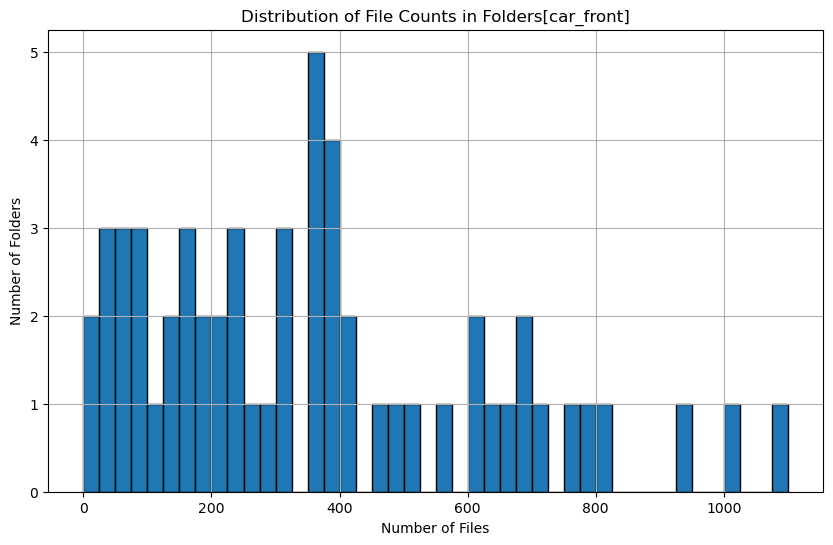

In [6]:
import matplotlib.pyplot as plt

# 히스토그램 설정하기
plt.figure(figsize=(10, 6))
plt.hist(df['Number of Files'], bins=range(0, max(df['Number of Files']) + 25, 25), edgecolor='black')
plt.title('Distribution of File Counts in Folders[car_front]')
plt.xlabel('Number of Files')
plt.ylabel('Number of Folders')

# 그리드 만들기
plt.grid(True)

# 히스토그램 그리기
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7320\4070717693.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Adjusted Files'] = adjust_bins(filtered_df['Number of Files'], 200, 200, 400, 375)


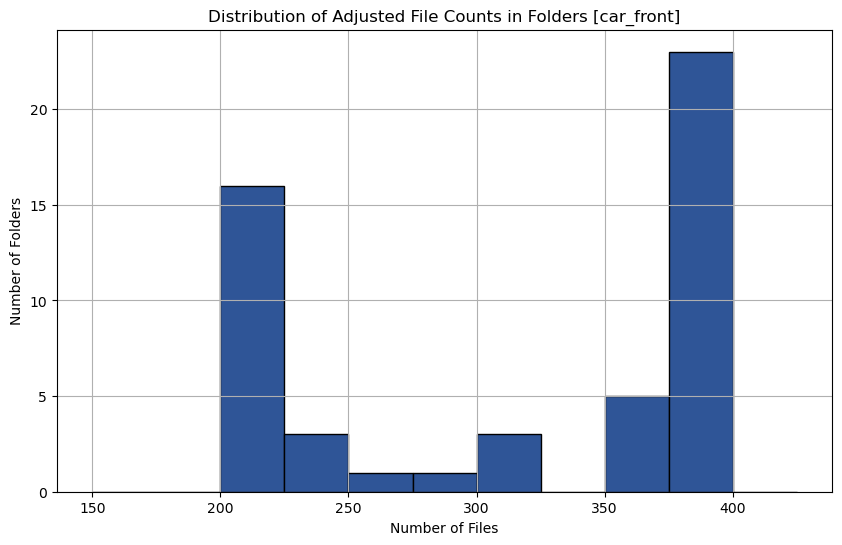

In [12]:
def adjust_bins(data, low_threshold, low_bin, high_threshold, high_bin):
    """특정 조건에 맞춰 데이터를 조정하는 함수"""
    data_adjusted = data.apply(lambda x: low_bin if x <= low_threshold else (high_bin if x >= high_threshold else x))
    return data_adjusted

directory = 'angle_jpg/car_front'
file_counts = count_files(directory)

# 데이터 프레임 생성
df = pd.DataFrame(list(file_counts.items()), columns=['Folder', 'Number of Files'])

# 파일 개수가 50개 이하인 폴더 제거
filtered_df = df[df['Number of Files'] > 50]

# 데이터 조정: 200개 이하를 200 구간에, 400개 이상을 400 구간에 조정
filtered_df['Adjusted Files'] = adjust_bins(filtered_df['Number of Files'], 200, 200, 400, 375)

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
# 히스토그램 빈(bin) 범위 시작을 150부터로 조정
plt.hist(filtered_df['Adjusted Files'], bins=range(150, 426, 25), edgecolor='black', color='#2F5597')
plt.title('Distribution of Adjusted File Counts in Folders [car_front]')
plt.xlabel('Number of Files')
plt.ylabel('Number of Folders')
plt.grid(True)
plt.show()
